In [14]:
# https://www.kaggle.com/ddmasterdon/income-adult
import pandas as pd
import numpy as np

## a.1

The data has salary column along with the other categories to predict the income of the people based on a demographic.
with 32561 rows and 15 columns


## a.2

url is https://www.kaggle.com/ddmasterdon/income-adult, when open this url, you will see a download button, just click it to down the dataset

## a.3

Two interesting questions about the data
- 1) Question 1: Income level is related to educational background？
- 2) Question 2:What position has the highest salary

## b

In [2]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## c

In [4]:
# describe the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### d.1

In [6]:
# print the array of columns and the index array
print(df.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')


In [7]:
print(df.index)

RangeIndex(start=0, stop=32561, step=1)


### d.2 

<AxesSubplot:>

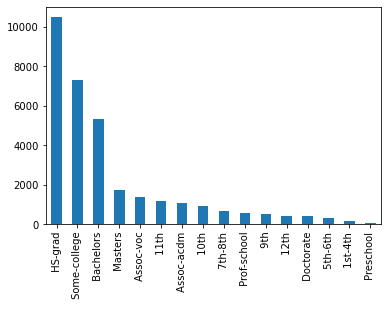

In [10]:
# create some simple plot of part of the data
df[' education'].value_counts().plot.bar() # Understand the relevant distribution of secondary school calendars in the sample

<AxesSubplot:>

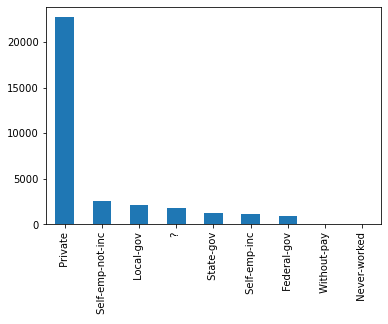

In [11]:
# Understand different types of work
df[' workclass'].value_counts().plot.bar()

## d.3

In [18]:
pivot_df = df.pivot_table(values=" hours-per-week", index=' marital-status', aggfunc=np.mean).reset_index()
pivot_df

,marital-status,hours-per-week
0,Divorced,41.246680
1,Married-AF-spouse,41.130435
2,Married-civ-spouse,43.284856
3,Married-spouse-absent,39.669856
4,Never-married,36.939998
5,Separated,39.301463
6,Widowed,32.979859


<AxesSubplot:xlabel=' marital-status'>

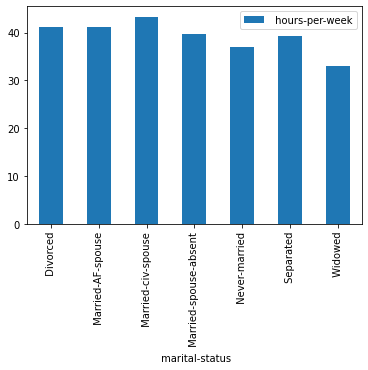

In [20]:
# Use this bar chart to understand the time spent on work by people of different marriage types
pivot_df.plot(kind='bar', x=' marital-status', y=' hours-per-week')

## d.4

In [25]:
group_df = pd.DataFrame(df.groupby(" race")[' salary'].value_counts())
group_df

salary
 race                salary         
 Amer-Indian-Eskimo  <=50K       275
                     >50K         36
 Asian-Pac-Islander  <=50K       763
                     >50K        276
 Black               <=50K      2737
                     >50K        387
 Other               <=50K       246
                     >50K         25
 White               <=50K     20699
                     >50K       7117

## e

- 1)It can be seen from the last table of groupby that most of the samples of this data are white, and the proportion of other races is relatively small. In addition, it can also be found that among people with white race, they are more likely to get a salary greater than 50K
- 2)People with married civ spuuse spend more time at work than others and may need more working hours to support their family's income and expenses
- 3)The sample objects whose work type is private account for the vast majority
- 4) In all samples, highly educated people, such as professors, still account for a relatively small proportion in the population, and there are relatively more objects of HS grad